## Import packages & load data 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

### Concat from daily reports

In [2]:
'''paths = []
for day_of_month in range(1,8):
    path = 'menu_2210' + f"{day_of_month:02d}" + '.xlsx'
    paths.append(path)'''

'paths = []\nfor day_of_month in range(1,8):\n    path = \'menu_2210\' + f"{day_of_month:02d}" + \'.xlsx\'\n    paths.append(path)'

In [3]:
'''all_data = []
for p in paths:
    data = pd.read_excel(p, engine='openpyxl')
    all_data.append(data)
df = pd.concat(all_data)'''

"all_data = []\nfor p in paths:\n    data = pd.read_excel(p, engine='openpyxl')\n    all_data.append(data)\ndf = pd.concat(all_data)"

### ... or get directly from the main report

In [4]:
df = pd.read_csv('FnB_sales_w1_OCT22.csv')
df

,order_id,order_type,store,partner,order_date,order_time,customer_name,customer_address,product_category,product,detail,quantity,unit_price,extra_fee,discount,total,payment,payment_partner
0,QKCT221001162240,offline,Scruffy,NaN,01-10-22,16:22,NaN,NaN,COMBO SNACKS,ixuxut,Size S,1.0,29000.0,NaN,NaN,29000.0,COD,NaN
1,MKPA221001162157,offline,Scruffy,NaN,01-10-22,16:21,NaN,NaN,SPECIAL DRINK,afabut 29K,Size M,1.0,29000.0,NaN,NaN,29000.0,COD,NaN
2,PQZH221001161710,offline,Scruffy,NaN,01-10-22,16:17,NaN,NaN,SPECIAL DRINK,ezopur 29K,Size M,1.0,29000.0,NaN,NaN,29000.0,QUICKPAY,MoMo
3,SEHU221001161621,offline,Scruffy,NaN,01-10-22,16:16,NaN,NaN,NOODLES,equfuh,Size M,1.0,20000.0,5000.0,NaN,25000.0,COD,NaN
4,HIRB221001154407,offline,Scruffy,NaN,01-10-22,15:44,NaN,NaN,NOODLES,equfuh,Size M,2.0,20000.0,5000.0,NaN,50000.0,COD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91103,BNAE221007092306,offline,Thumper,NaN,07-10-22,9:23,NaN,NaN,SOFT DRINK,ofufen,Size M,1.0,25000.0,NaN,NaN,25000.0,COD,NaN
91104,BRAW221007090621,offline,Thumper,NaN,07-10-22,9:06,NaN,NaN,SOFT DRINK,ovisaq,Size M,1.0,25000.0,NaN,NaN,25000.0,COD,NaN
91105,VUXW221007075301,offline,Thumper,NaN,07-10-22,7:53,NaN,NaN,SOFT DRINK,ofufen,Size M,1.0,25000.0,NaN,NaN,25000.0,COD,NaN
91106,OUVD221007074510,offline,Thumper,NaN,07-10-22,7:45,NaN,NaN,SOFT DRINK,obivad,Size M,1.0,25000.0,NaN,NaN,25000.0,COD,NaN


### Take an overview on data

In [5]:
# Check data types and null/ non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91108 entries, 0 to 91107
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          91108 non-null  object 
 1   order_type        91108 non-null  object 
 2   store             91108 non-null  object 
 3   partner           3545 non-null   object 
 4   order_date        91108 non-null  object 
 5   order_time        91108 non-null  object 
 6   customer_name     254 non-null    object 
 7   customer_address  254 non-null    object 
 8   product_category  91108 non-null  object 
 9   product           91108 non-null  object 
 10  detail            82410 non-null  object 
 11  quantity          91102 non-null  float64
 12  unit_price        88386 non-null  float64
 13  extra_fee         44087 non-null  float64
 14  discount          128 non-null    float64
 15  total             88362 non-null  float64
 16  payment           91108 non-null  object

In [6]:
# Go through some statistics about the data
df.describe(include='all')

,order_id,order_type,store,partner,order_date,order_time,customer_name,customer_address,product_category,product,detail,quantity,unit_price,extra_fee,discount,total,payment,payment_partner
count,91108,91108,91108,3545,91108,91108,254,254,91108,91108,82410,91102.000000,88386.000000,44087.000000,128.000000,8.836200e+04,91108,9631
unique,71631,2,104,5,7,1254,91,99,41,221,116,NaN,NaN,NaN,NaN,NaN,5,11
top,SOQN221003120451,offline,Shady,GrabFood,03-10-22,7:48,Nhật Hoà,"119 Đường Lương Định Của, Quận 2, Thành phố Hồ...",NOODLES,equfuh,Size M,NaN,NaN,NaN,NaN,NaN,COD,MoMo
freq,20,90854,3932,1014,14310,307,12,12,47537,39946,45350,NaN,NaN,NaN,NaN,NaN,80051,6506
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.220004,23746.251669,8023.317531,21675.781250,3.300977e+04,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234845,7144.671541,4427.784117,14333.293637,2.809524e+04,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,1000.000000,5000.000000,2450.000000,1.000000e+03,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,20000.000000,5000.000000,5850.000000,2.000000e+04,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,20000.000000,5000.000000,25000.000000,2.500000e+04,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,29000.000000,10000.000000,35000.000000,3.500000e+04,NaN,NaN


## Clean & transform data

### Delete unnecessary columns

In [7]:
del df['customer_name'], df['customer_address']

### Add hour column

In [8]:
get_hour = lambda time: time.split(':')[0]
df['order_hour'] = df['order_time'].apply(get_hour)

### Move column

In [9]:
hour_col = df.pop('order_hour')
df.insert(6, 'order_hour', hour_col)

### Change data type

In [10]:
df['order_hour'] = pd.to_numeric(df['order_hour'])

### Create date of week column

In [11]:
get_dayofweek = lambda x: datetime.strptime(x, '%d-%m-%y').strftime('%A')
df['order_dayofweek'] = df['order_date'].apply(get_dayofweek)

In [12]:
wd_col = df.pop('order_dayofweek')
df.insert(5, 'order_dayofweek', wd_col)

### Format number values

In [13]:
pd.options.display.float_format = '{:,.0f}'.format

## Reporting

### Question 1: Total revenue by day

In [14]:
revenue_by_day = df.groupby('order_date').sum()['total'].reset_index()
revenue_by_day.sort_values(by='total', ascending=False)

# > 04/10 is the day with the highest revenue (463,356,100 VND).

,order_date,total
3,04-10-22,"463,356,100"
2,03-10-22,"459,735,200"
4,05-10-22,"457,825,500"
5,06-10-22,"450,604,600"
6,07-10-22,"450,432,850"
0,01-10-22,"330,793,150"
1,02-10-22,"304,061,900"


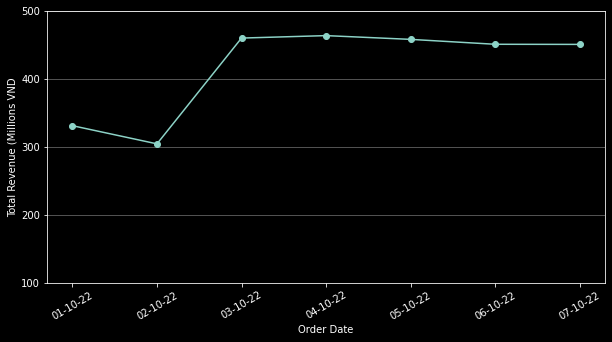

In [15]:
plt.figure(figsize=(10,5))
plt.plot(revenue_by_day['order_date'], revenue_by_day['total']/1000000, marker='o')
plt.ylabel('Total Revenue (Millions VND')
plt.xlabel('Order Date')
plt.yticks(ticks=range(100,501,100))
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.4)
plt.show()

### Question 2: Top 10 stores by revenue?

In [16]:
revenue_by_store = df.groupby('store').sum()['total'].reset_index()
top10_store = revenue_by_store.sort_values(by='total', ascending=False).head(10)
top10_store

,store,total
85,Shady,"144,880,000"
13,Beaux,"118,565,500"
76,Queenie,"82,457,000"
35,Frankie,"67,052,500"
26,Cricket,"65,601,100"
80,Rocky,"65,128,000"
30,Erin,"60,680,000"
14,Belle,"60,658,250"
71,Nico,"58,059,000"
89,Sneakers,"54,682,500"


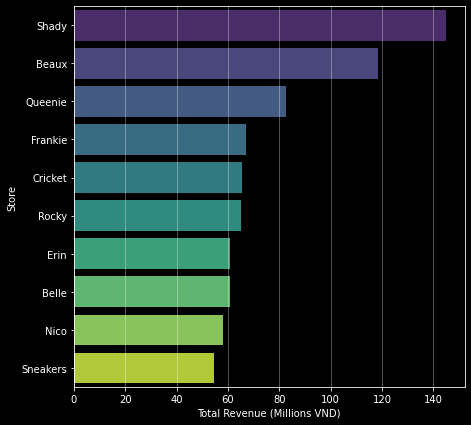

In [17]:
plt.figure(figsize=(7,7))
sns.barplot(y=top10_store['store'], x=top10_store['total']/1000000, palette='viridis', orient='h')
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Store')
plt.xlabel('Total Revenue (Millions VND)')
plt.show()

### Question 3: The average revenue per day of week?

In [18]:
revenue_by_dateofweek = df.groupby(['order_date', 'order_dayofweek']).sum().reset_index()
revenue_by_dateofweek = revenue_by_dateofweek.groupby('order_dayofweek').mean()['total'].reset_index()

weekdate = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_dateofweek['order_dayofweek'] = pd.Categorical(revenue_by_dateofweek['order_dayofweek'], weekdate, ordered=True)
revenue_by_dateofweek.sort_values(by='order_dayofweek', ascending=True, inplace=True)
revenue_by_dateofweek

,order_dayofweek,total
1,Monday,"459,735,200"
5,Tuesday,"463,356,100"
6,Wednesday,"457,825,500"
4,Thursday,"450,604,600"
0,Friday,"450,432,850"
2,Saturday,"330,793,150"
3,Sunday,"304,061,900"


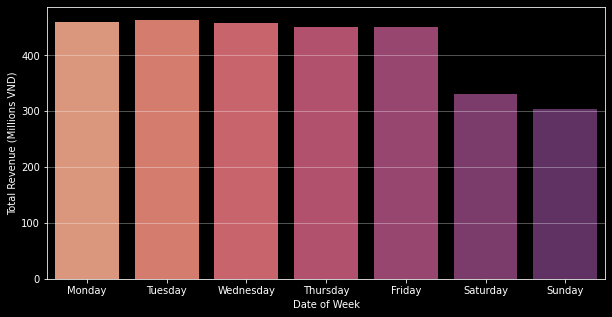

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_dateofweek['order_dayofweek'], y=revenue_by_dateofweek['total']/1000000, palette='flare')
plt.grid(axis='y', alpha=0.4)
plt.ylabel('Total Revenue (Millions VND)')
plt.xlabel('Date of Week')
plt.show()

# > The average revenue of weekdays are higher than weekend, seems like most of our customers are office workers.
# To clear that, we will dig deeper into this data

### Question 4: If most of our customers are office workers, then they tend to buy our coffee in the morning or at the noon, let's check it out

In [20]:
df_hour = df.groupby('order_hour').sum()['total'].reset_index()

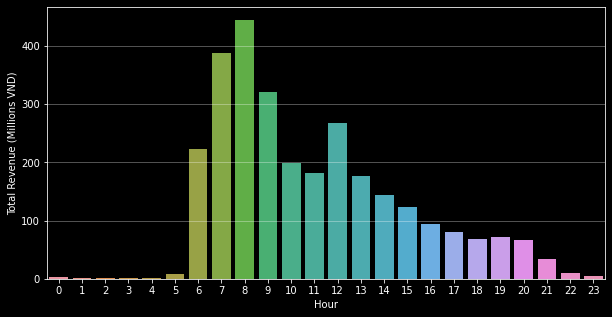

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_hour['order_hour'], y=df_hour['total']/1000000)
plt.grid(axis='y', alpha=0.4)
plt.ylabel('Total Revenue (Millions VND)')
plt.xlabel('Hour')
plt.show()
# > We are right! 7am-10am and 12pm-1pm are peak times of our sales within day

### Question 5: Average amount of an order

In [22]:
avg_amount_order = df.groupby('order_id').sum()['total'].mean()
avg_amount_order

#> It's about 40,700 VND, seems a bit high, let's check outliers:

40719.92991861066

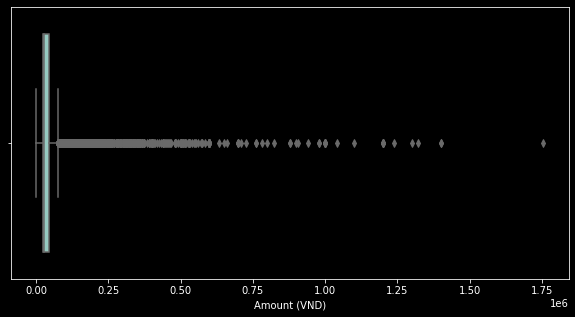

In [23]:
amount_order = df.groupby('order_id').sum()['total'].reset_index()

plt.figure(figsize=(10,5))
sns.boxplot(data=amount_order, x='total')
plt.xlabel('Amount (VND)')
plt.show()

# > Well, we have too much outliers here. Try to narrow down the amount to under 200,000 VND

In [24]:
avg_amount_order_under100 = amount_order[amount_order['total'] <= 200000].groupby('order_id').sum()['total'].mean()
avg_amount_order_under100


38162.80261231843

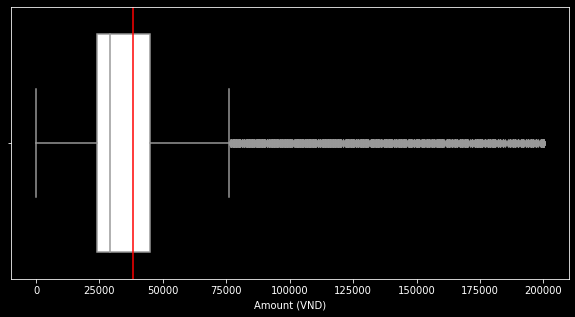

In [25]:
amount_order_under100 = amount_order[amount_order['total'] <= 200000]

plt.figure(figsize=(10,5))
sns.boxplot(data=amount_order_under100, x='total', color='w')
plt.axvline(x=avg_amount_order_under100, color='r')
plt.xlabel('Amount (VND)')
plt.show()

# > It's better!

### Question 6: Who is the partner that bring us the highest revenue? Compare between days of week.

In [26]:
df_reshape = df.groupby(['order_dayofweek','partner']).sum().reset_index()
df_pivot = df_reshape.pivot(columns='partner', index='order_dayofweek', values='total').sort_values(by='order_dayofweek')
df_pivot

partner,Baemin,BeFood,Gojek,GrabFood,ShopeeFood
order_dayofweek,,,,,
Friday,"3,598,000","1,713,000","4,676,400","7,148,000","5,385,000"
Monday,"3,848,000","1,901,000","4,244,100","8,171,000","6,905,000"
Saturday,"4,113,000","949,000","3,804,200","6,002,000","3,793,000"
Sunday,"3,776,000","1,057,000","3,514,100","3,578,000","3,934,000"
Thursday,"3,546,000","2,322,000","5,248,200","6,995,000","7,605,000"
Tuesday,"4,694,000","1,745,000","5,114,100","9,033,000","7,627,000"
Wednesday,"3,281,000","1,441,000","5,398,300","6,838,000","6,698,000"


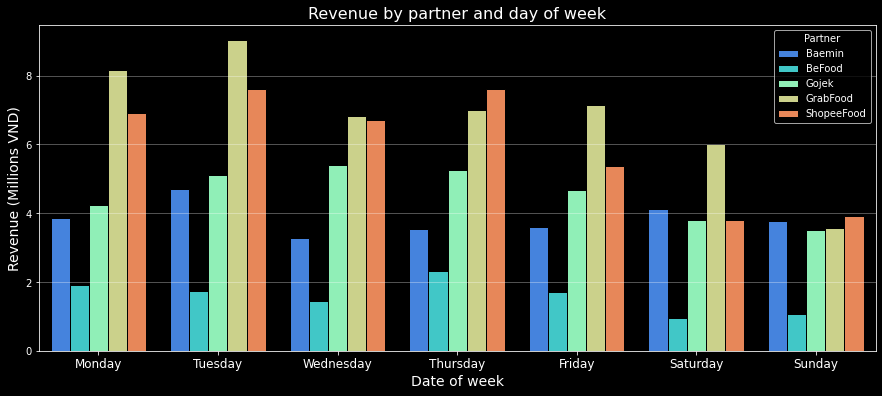

In [27]:
df_date_partner = df.groupby(['order_dayofweek', 'partner']).sum()['total'].reset_index()
df_date_partner['order_dayofweek'] = pd.Categorical(df_date_partner['order_dayofweek'], weekdate, ordered=True)

plt.figure(figsize=(15,6))
sns.barplot(data=df_date_partner, x='order_dayofweek', y=df_date_partner['total']/1000000, hue='partner', edgecolor='black', palette='rainbow')
plt.grid(axis='y', alpha=0.4)
plt.title('Revenue by partner and day of week', fontsize=16)
plt.ylabel('Revenue (Millions VND)', fontsize=14)
plt.xlabel('Date of week', fontsize=14)
plt.legend(title='Partner')
plt.xticks(fontsize=12)
plt.show()

# > Grabfood and ShopeeFood are our 2 biggest partners

### Some other facts:

#### Top 5 product category by sold quantity

In [28]:
top5_cat = df.groupby('product_category').sum()['quantity'].reset_index().sort_values(by='quantity', ascending=False).head(5)
top5_cat

,product_category,quantity
27,NOODLES,"52,791"
4,BUY 1 GET 2,"14,748"
13,COMBO SNACKS,"7,535"
17,FRESH JUICE,"5,535"
34,SPECIAL DRINK,"4,442"


#### The most popular payment partners (by number of orders)

In [29]:
df[['order_id','payment_partner']].drop_duplicates()['payment_partner'].value_counts()

# > Momo is the number 1 in our list, followed by VnPay.

MoMo            5159
VnPay           1120
ZaloPay          517
ShopeePay        271
PosCard          156
GrabPay           71
MoMoAPP           35
VNPTEPAY          11
ZaloPayAPP         7
KBank              4
ShopeePayAPP       3
Name: payment_partner, dtype: int64

#### Function to get the revenue and number of orders from a store:

In [30]:
def sales_store(store):
    revenue = df[df['store'] == store]['total'].sum()
    num_orders = len(df[df['store'] == store]['order_id'].unique())
    return revenue, num_orders

sales_store('Thumper')

(43851000.0, 1245)